In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import networkx as nx

In [3]:
subtotal= pd.read_csv('podol_subtotal.csv')

In [6]:
subtotal[subtotal['PD_BRA_NM']=='아디다스 오리지널']['CLAC3_NM'].unique()

array(['여성스포츠티셔츠/탑', '여성스포츠샌들/슬리퍼', '여성런닝/트레이닝화', '유아동런닝/트레이닝화', '스포츠모자',
       '여성스포츠전신/원피스', '남성스포츠티셔츠', '여성일반스포츠바지', '남성일반스포츠바지', '여성슬리퍼',
       '여성스포츠스웨트셔츠/후드/집업', '유아동스포츠티셔츠/탑', '유아동트레이닝복', '여성트레이닝복',
       '남성런닝/트레이닝화', '남성스포츠점퍼/재킷', '스포츠가방', '스포츠양말', '여성스포츠스커트', '여성바지',
       '스포츠선글라스', '여성숄더백', '여성스니커즈', '유아동스포츠샌들/슬리퍼', '유아동스니커즈',
       '여성스포츠베스트', '남성스니커즈', '남성티셔츠', '여성티셔츠/탑', '여성방한화'], dtype=object)

In [7]:
subtotal[subtotal['PD_BRA_NM']=='아디다스 오리지날']['CLAC3_NM'].unique()

array(['여성스포츠티셔츠/탑', '남성스포츠티셔츠', '남성일반스포츠바지', '여성트레이닝복', '여성런닝/트레이닝화',
       '여성일반스포츠바지', '여성스포츠샌들/슬리퍼', '유아동런닝/트레이닝화', '스포츠모자', '남성런닝/트레이닝화',
       '스포츠가방', '남성스포츠점퍼/재킷', '여성스니커즈', '여성방한화'], dtype=object)

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
print(font_name)

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

AppleGothic


In [3]:
network = pd.read_csv('network.csv')

In [4]:
network = network.sort_values(['node1','node2'])

In [5]:
node1 = network['node1']
node2 = network['node2']

In [6]:
sedge = [(a,b) if a < b else (b,a) for a,b in zip(node1,node2)]

In [55]:
wgtedge = sedge
wgtedge = pd.DataFrame(wgtedge,columns=['node1','node2'])
wgtedge['count'] = [1 for i in range(len(wgtedge))]

In [56]:
wgtedge.head()

,node1,node2,count
0,3.0,445890.0,1
1,3.0,447236.0,1
2,3.0,478949.0,1
3,3.0,660815.0,1
4,7.0,5229.0,1


In [57]:
wgtedge= wgtedge.groupby(['node1','node2']).sum()
wgtedge.reset_index(inplace=True)


In [58]:
wgtedge.sort_values('count',ascending=False).head()


,node1,node2,count
763614,207981.0,208785.0,640
911367,242021.0,242022.0,466
2544236,737743.0,737745.0,274
2645361,809108.0,833515.0,269
1986925,495506.0,537192.0,245


In [59]:
wgtedge = [tuple(x) for x in wgtedge.values]


In [7]:
data= pd.read_csv('podol_subtotal.csv')

In [8]:
vc = network['node1'].value_counts().to_frame()
vc2 = network['node2'].value_counts().to_frame()

In [9]:
vc.reset_index(inplace=True)
vc.columns=['PD_C','node_bin']
vc2.reset_index(inplace=True)
vc2.columns=['PD_C','node_bin2']



In [10]:
new = vc.merge(vc2,on='PD_C',how='outer')


In [11]:
new = new.fillna(0)

In [12]:
new['bincount'] = new['node_bin']+new['node_bin2']

In [13]:
new = new.drop(columns=['node_bin','node_bin2'])

In [10]:
new.sort_values('bincount',ascending=False).head()

,PD_C,bincount
0,748308.0,2438.0
3,737743.0,2414.0
1,461083.0,2370.0
2,753343.0,2081.0
10,566215.0,1914.0


In [14]:
ctg = data[['CLAC3_NM','CLAC2_NM','CLAC1_NM','PD_BRA_NM','PD_NM','PD_C']].groupby('PD_C',as_index=False).last()

In [95]:
network.head()

,node1,node2
98784,3.0,445890.0
98785,3.0,447236.0
98786,3.0,478949.0
98787,3.0,660815.0
836431,7.0,5229.0


In [98]:
ctg.head()

,PD_C,CLAC3_NM,CLAC2_NM,CLAC1_NM,PD_BRA_NM,PD_NM
0,1,압력솥,조리기구,식기/조리기구,풍년,PN클래드IH압력솥 2인용+사은품 실리콘그립손잡이 증정
1,2,목걸이,보석,패션잡화,스톤헨지(주얼리),스톤헨지 레이어드목걸이 SC0084
2,3,골프연습장비,골프,구기/필드스포츠,XEEON,[XEEON] 에어렉스 스포츠 골프화 실리콘 신발끈 - 그린
3,4,골프연습장비,골프,구기/필드스포츠,XEEON,[XEEON] 에어렉스 스포츠 골프화 실리콘 구두끈 - 블랙
4,5,골프연습장비,골프,구기/필드스포츠,XEEON,[XEEON] 에어렉스 골프화 실리콘신발끈 + 실리콘구두끈 세트 - 구두끈_브라운 ...


In [107]:
ctg3 = ctg[['CLAC3_NM','PD_C']]
ctg3 = ctg3.set_index('PD_C').T.to_dict('record')

In [108]:
ctg3network = network

In [103]:
network.head()

,node1,node2
98784,3.0,445890.0
98785,3.0,447236.0
98786,3.0,478949.0
98787,3.0,660815.0
836431,7.0,5229.0


In [148]:
ctg3network = network

In [150]:
ctg3network['CLAC3_node1'] = [ctg3[0][x] if ctg3[0][x] <= ctg3[0][y] else ctg3[0][y] for x,y in zip(ctg3network['node1'],ctg3network['node2'])]

ctg3network['CLAC3_node2'] = [ctg3[0][y] if ctg3[0][x] < ctg3[0][y] else ctg3[0][x] for x,y in zip(ctg3network['node1'],ctg3network['node2'])]

In [151]:
ctg3network['CLAC3_EDGES'] =[(a,b) for a,b in zip(ctg3network['CLAC3_node1'],ctg3network['CLAC3_node2'])]

In [128]:
ctg3network.head()

,node1,node2,CLAC3_EDGES,CLAC3_node1,CLAC3_node2
98784,3.0,445890.0,"(골프연습장비, 남아티셔츠/탑)",골프연습장비,남아티셔츠/탑
98785,3.0,447236.0,"(골프연습장비, 영유아티셔츠/탑)",골프연습장비,영유아티셔츠/탑
98786,3.0,478949.0,"(골프연습장비, 남아티셔츠/탑)",골프연습장비,남아티셔츠/탑
98787,3.0,660815.0,"(골프연습장비, 거실화/실내화)",골프연습장비,거실화/실내화
836431,7.0,5229.0,"(아쿠아슈즈, 출산/신생아용품세트)",아쿠아슈즈,출산/신생아용품세트


In [15]:
ntwpd = new.merge(ctg,on='PD_C')

In [86]:
pd3 = ntwpd.groupby('CLAC3_NM').count()

In [87]:
pd3

,PD_C,bincount,CLAC2_NM,CLAC1_NM,PD_BRA_NM,PD_NM
CLAC3_NM,,,,,,
2단우산,19,19,19,19,19,19
3단우산,184,184,184,184,184,184
BB/파운데이션/컴팩트류,1809,1809,1809,1809,1809,1809
DIY가구,5,5,5,5,5,5
DIY완구,2,2,2,2,2,2
DSLR,15,15,15,15,15,15
LCD,1,1,1,1,1,1
LED,43,43,43,43,43,43
OLED,1,1,1,1,1,1


In [16]:
ntwpd.sort_values('bincount',ascending=False)

,PD_C,bincount,CLAC3_NM,CLAC2_NM,CLAC1_NM,PD_BRA_NM,PD_NM
0,748308.0,2438.0,립스틱/립라이너,메이크업,화장품/뷰티케어,맥,립스틱 - 온 홀드
3,737743.0,2414.0,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,입생로랑,[리필] 르 쿠션 엉크르 드 뽀 SPF23 PA++ 14g - 40
1,461083.0,2370.0,남아바지,남아의류하의,유아동의류,뉴발란스(키즈),냉감 슬림핏 5부 팬츠/유아동반바지/NK9V82102U - 네이비 / 130
2,753343.0,2081.0,남성팬티,남성속옷,속옷/양말/홈웨어,코데즈컴바인 이너웨어,남성 드로즈 15종 택1 - 06_CCCDRM92WN / 105
10,566215.0,1914.0,남아티셔츠/탑,남아의류상의,유아동의류,네파키즈,솔리드 더블팩(티셔츠 2장세트) KEG5300 - DK PINK(408) / 120
5,658747.0,1831.0,블러셔/쉐이딩/하이라이터,메이크업,화장품/뷰티케어,입생로랑,따뚜아쥬 꾸뛰르 타투틴트 - 15바이올렛 컨빅션
4,207981.0,1798.0,여성덧신류,여성양말류,속옷/양말/홈웨어,올삭스,D (여) 심플베이직덧신 스킨 - (여)스킨
8,427578.0,1745.0,여성속옷세트,여성속옷,속옷/양말/홈웨어,코데즈컴바인 이너웨어,여성 베이직 밴딩 브라팬티 4종 택1 - 01)CDBBRM51NY/set / 80B/90
6,523581.0,1711.0,영유아티셔츠/탑,유아의류상의,유아동의류,뉴발란스(키즈),빅로고 반팔티/유아동키즈티셔츠/NK9E82101U - 블랙 / 130
7,294477.0,1653.0,남성티셔츠,남성의류상의,남성의류,에이치커넥트,여성 4칼라 기본라운드 반팔티 (30121-131-001-05JS) - 131(베이...


## weight 없는 edge

In [77]:
node_list= data['PD_C'].unique()
edge_list = sedge

G=nx.Graph()

G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

In [82]:
nx.write_graphml(G, "not_wgt_graph.graphml")

In [84]:
testg = nx.read_graphml('not_wgt_graph.graphml')

In [85]:
testg.number_of_edges()

2675154

In [ ]:

nx.draw(G)
plt.show()

In [58]:
G.number_of_edges()

2675154

## weight 있는 edge

In [75]:
node_list= data['PD_C'].unique()
edge_list = wgtedge

WG = nx.Graph()

WG.add_nodes_from(node_list)
WG.add_weighted_edges_from(edge_list)

In [76]:
WG.number_of_edges()

2675154

In [83]:
nx.write_graphml(WG, "wgt_graph.graphml")

## ctg3 network

In [122]:
ctg3_node_list = ctg['CLAC3_NM'].unique()
ctg3_edge_list = ctg3network['CLAC3_EDGES'] 

ctg3G = nx.Graph()

ctg3G.add_nodes_from(ctg3_node_list)
ctg3G.add_edges_from(ctg3_edge_list)

In [123]:
ctg3G.number_of_edges()

102713

In [124]:
nx.write_graphml(ctg3G, "not_wgt_ctg3graph.graphml")

## wgt_ctg3 network

In [154]:
ctg3_wgtedge = ctg3network[['CLAC3_node1','CLAC3_node2']]
ctg3_wgtedge['count'] = [1 for i in range(len(ctg3_wgtedge))]

/Users/YiYoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [155]:
ctg3_wgtedge.head()

,CLAC3_node1,CLAC3_node2,count
98784,골프연습장비,남아티셔츠/탑,1
98785,골프연습장비,영유아티셔츠/탑,1
98786,골프연습장비,남아티셔츠/탑,1
98787,거실화/실내화,골프연습장비,1
836431,아쿠아슈즈,출산/신생아용품세트,1


In [156]:
ctg3_wgtedge= ctg3_wgtedge.groupby(['CLAC3_node1','CLAC3_node2']).sum()
ctg3_wgtedge.reset_index(inplace=True)

In [145]:
ctg3_wgtedge[:77]

[('2단우산', '2단우산', 3),
 ('2단우산', '3단우산', 5),
 ('2단우산', 'BB/파운데이션/컴팩트류', 1),
 ('2단우산', '골프패션잡화', 2),
 ('2단우산', '기타냉동간편식', 1),
 ('2단우산', '기타냉방가전', 1),
 ('2단우산', '기타일반문구/사무용품', 2),
 ('2단우산', '기타캠핑용품', 1),
 ('2단우산', '남성등산바지', 1),
 ('2단우산', '남성캐주얼바지', 3),
 ('2단우산', '남성티셔츠', 7),
 ('2단우산', '남아스웨터/풀오버', 1),
 ('2단우산', '목욕타올', 1),
 ('2단우산', '샴푸', 1),
 ('2단우산', '서랍장/수납장', 1),
 ('2단우산', '선반장/행거', 1),
 ('2단우산', '수세미/솔', 1),
 ('2단우산', '스포츠모자', 1),
 ('2단우산', '스포츠양말', 1),
 ('2단우산', '아동수영복', 1),
 ('2단우산', '아동우산', 3),
 ('2단우산', '애견의류/악세서리', 1),
 ('2단우산', '야구모자', 1),
 ('2단우산', '양산', 1),
 ('2단우산', '여성등산바지', 1),
 ('2단우산', '여성속옷세트', 1),
 ('2단우산', '여성점퍼', 1),
 ('2단우산', '여아점퍼', 1),
 ('2단우산', '여행용소품', 1),
 ('2단우산', '열쇠고리', 1),
 ('2단우산', '영유아바지', 1),
 ('2단우산', '유아동내의', 3),
 ('2단우산', '유아동레인부츠/슈즈', 1),
 ('2단우산', '장우산', 11),
 ('2단우산', '전통/종교장신구', 1),
 ('2단우산', '커튼', 1),
 ('2단우산', '쿠션/쿠션커버', 2),
 ('2단우산', '팔찌', 1),
 ('3단우산', '2단우산', 15),
 ('3단우산', '3단우산', 112),
 ('3단우산', 'BB/파운데이션/컴팩트류', 1),
 ('3단우산', '거실화/실내화', 1),

In [158]:
ctg3_wgtedge = [tuple(x) for x in ctg3_wgtedge.values]

In [159]:
ctg3_node_list = ctg['CLAC3_NM'].unique()


## normal graph

In [160]:
ctg3wgtG = nx.Graph()

ctg3wgtG.add_nodes_from(ctg3_node_list)
ctg3wgtG.add_weighted_edges_from(ctg3_wgtedge)

In [161]:
ctg3wgtG.number_of_edges()

102713

In [162]:
nx.write_graphml(ctg3wgtG, "wgt_ctg3graph.graphml")

In [163]:
ctg3wgtG.degree('3단우산')

292

In [164]:
ctg3wgtG.degree('2단우산')

77

/Users/YiYoung/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


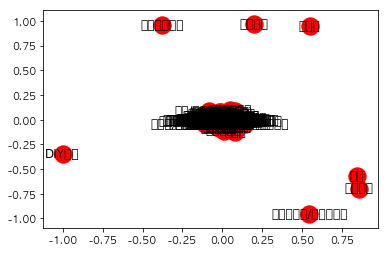

In [172]:
nx.draw_networkx(ctg3wgtG)